# Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Instalando as bibliotecas

**Antes de Importar a base é necessário instalar algumas bibliotecas como:**
1. Pandas: é uma biblioteca de análise
de dados em Python que oferece estruturas de dados e ferramentas para manipulação e análise de dados. Com o Pandas, é possível ler, escrever e manipular dados em diversos formatos, como CSV, Excel, SQL, etc. Ele oferece uma grande quantidade de funcionalidades para trabalhar com dados em Python, incluindo a capacidade de filtrar, agregar, reorganizar e transformar dados de várias maneiras.

2. TextBlob: é uma biblioteca de processamento de linguagem natural em Python. Ela oferece uma interface simples para tarefas comuns de NLP, como análise de sentimentos, correção ortográfica, extração de frases-chave e classificação de texto. O TextBlob é construído sobre a biblioteca NLTK (Natural Language Toolkit) e oferece uma sintaxe fácil de usar para muitas tarefas de processamento de linguagem natural. É uma biblioteca muito útil para análise de texto em Python.

3. Emoji: é uma biblioteca Python que permite a conversão de emojis de texto para representações de texto Unicode e vice-versa. Além disso, fornece funções úteis para trabalhar com emojis, como contar o número de emojis em uma string, remover todos os emojis de uma string e substituir cada emoji em uma string por um texto de substituição especificado.

4. Re: A biblioteca "re" é uma ferramenta para trabalhar com expressões regulares, permitindo a extração e manipulação de informações de forma eficiente.

5. Unidecode: Unicode é um padrão de codificação de caracteres de forma universal para a representação de caracteres de todas as línguas escritas, bem como símbolos matemáticos, musicais, entre outros.

6. Enelvo.normaliser: A enelvo.normaliser é uma biblioteca específica para normalização de texto em português. Ela oferece recursos para corrigir erros de digitação, converter abreviações e substituir palavras informais por suas formas mais corretas. A função principal dessa biblioteca é auxiliar na normalização de texto, tornando-o mais padronizado e compreensível.

7. Numpy (np): A biblioteca numpy fornece estruturas de dados eficientes para manipulação e cálculos numéricos, além de funções matemáticas de alto desempenho.

8. Sklearn.feature_extraction.text.CountVectorizer: É uma classe do scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de tokens. Cada documento é representado por um vetor onde cada elemento é o número de ocorrências de um token específico no documento.

9. Keras.preprocessing.text.Tokenizer: É uma classe do Keras que é usada para pré-processamento de texto. Ela converte texto em sequências de números inteiros (índices de palavras) ou matrizes esparsas. Também oferece recursos como tokenização, vetorização e indexação de palavras.

10. Nltk.tokenize.word_tokenize: É uma função do NLTK (Natural Language Toolkit) que divide um texto em uma lista de palavras ou tokens. É uma forma de tokenização que leva em consideração o contexto linguístico para separar as palavras.

In [2]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 10.0 MB/s eta 0:00:00


In [3]:
pip install -U emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=8f5695299c531d0de426fddf7df1314514dc6ef55447f9b669b8372edfe5f95b
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji


In [4]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=60c91d139de99a9c307a26ed2c7a1b31b3c8b9ab43f9e959b10a3f5223f478e9
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.5.0
    Uninstalling emoji-2.5.0:
      Successfully uninstalled emoji-2.5.0


In [7]:
import pandas as pd
from textblob import TextBlob
import emoji
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re
import unidecode
from enelvo.normaliser import Normaliser
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode


import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from gensim.models import Word2Vec

## 1.3.Lendo CSV

In [9]:
dfW2Vmodelo2 = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/sentence_vectors2.csv')

In [10]:
len(dfW2Vmodelo2)

11415

A célula de código abaixo é responsável por realizar a leitura e apresentação dos dados carregados da base na etapa anterior.

**dados** - Apresenta a planilha dos comentários das campanhas de marketing do instagram do BTG Pactual

# Atividade 14 - Implementação do Embedding Layer com Word2Vec

O modelo de aprendizado profundo utilizado, que inclui as camadas de incorporação (Embedding), convolução unidimensional (Conv1D), pooling máximo global (GlobalMaxPooling1D) e camadas densas (Dense), traz benefícios significativos para o Processamento de Linguagem Natural (PLN).

Essas camadas são projetadas para lidar especificamente com dados textuais e têm vantagens específicas:

A camada de incorporação (Embedding) permite a representação eficiente de palavras em vetores densos de tamanho fixo, capturando relações semânticas e contextuais entre as palavras. Isso é fundamental para o PLN, pois possibilita que o modelo compreenda melhor as similaridades e diferenças entre as palavras em um texto, melhorando a capacidade de generalização e entendimento do contexto.

A camada convolucional unidimensional (Conv1D) é capaz de identificar padrões locais em sequências de palavras, como combinações específicas de palavras ou frases. Isso permite que o modelo extraia características relevantes dos dados textuais, capturando informações importantes em diferentes níveis de granularidade. A convolução unidimensional é especialmente útil para identificar características importantes em trechos curtos de texto.

A camada de pooling máximo global (GlobalMaxPooling1D) reduz a dimensionalidade dos recursos extraídos pela camada convolucional, mantendo as características mais importantes. Essa operação de pooling preserva as informações mais salientes, tornando o modelo mais robusto a variações na posição das características dentro das sequências. Além disso, o pooling máximo global permite que o modelo trabalhe com sequências de comprimentos variáveis, já que retorna um vetor de características fixo independentemente do tamanho da sequência original.

As camadas densas (Dense) são responsáveis por aprender padrões mais complexos nos recursos extraídos pelas camadas anteriores. Elas permitem que o modelo capture relações não lineares entre as características, aumentando a capacidade de representação e aprendizado. As camadas densas são cruciais para a tomada de decisões finais do modelo, mapeando os recursos em probabilidades de pertencer a cada classe e permitindo a classificação adequada dos dados textuais.

Portanto, o uso dessas camadas no modelo de aprendizado profundo para PLN traz ganhos significativos, permitindo que o modelo compreenda melhor o contexto, identifique padrões relevantes nas sequências de palavras e capture informações importantes para a classificação precisa dos dados textuais. Essa arquitetura é especialmente útil para tarefas como classificação de sentimentos, análise de sentimento, categorização de texto e muitas outras aplicações de PLN.

**Referências**

(1) What Are Embedding Layers in Neural Networks? - Baeldung.

https://www.baeldung.com/cs/neural-nets-embedding-layers.

(2) Understanding Embedding Layer in Keras | by sawan saxena - Medium.

https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce.

(3) Embedding layer - Keras.

https://keras.io/api/layers/core_layers/embedding/.

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer

## 14.1 - Definição da Função

In [12]:
def classification_embedding_layer(X, y):
  # Separar em conjuntos de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Tokenizar os dados
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train)
  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)

  # Obter o tamanho do vocabulário
  vocab_size = len(tokenizer.word_index) + 1

  # Padding para ter sequências com o mesmo comprimento
  max_length = 50
  X_train = pad_sequences(X_train, maxlen=max_length)
  X_test = pad_sequences(X_test, maxlen=max_length)

  # Criar o modelo
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
  model.add(LSTM(128))
  model.add(Dense(3, activation='softmax'))

  # Compilar o modelo
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_train, y_train, epochs=10, batch_size=32)

  # Fazer previsões no conjunto de teste
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)

  # Printar o relatório de classificação (incluindo recall)
  labels = ['Negative', 'Positive', 'Neutral']

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  report = classification_report(y_test, y_pred, target_names=labels)
  print(report)

  return model, y_test, y_pred

## Embedding Layer - Duas categorias e com balanceamento

### 14.2 - Teste de Função

In [13]:
"""
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced['Frase'])
Y = np.array(dfrnn_balanced['sentimento'])

# Definição dos hiperparâmetros
num_epochs = 20
batch_size = 64
learning_rate = 0.001
num_hidden_units = 128
embedding_dim = 50

loss, accuracy, y_pred, y_test, X_test = classification_embedding_layer(X, Y, num_epochs, batch_size, learning_rate, num_hidden_units, embedding_dim)
"""

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced['Frase'])\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Definição dos hiperparâmetros\nnum_epochs = 20\nbatch_size = 64\nlearning_rate = 0.001\nnum_hidden_units = 128\nembedding_dim = 50\n\nloss, accuracy, y_pred, y_test, X_test = classification_embedding_layer(X, Y, num_epochs, batch_size, learning_rate, num_hidden_units, embedding_dim)\n"

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

In [14]:
"""
# Calcular a matriz de confusão
confusion = confusion_matrix(y_pred,y_test)

print("Matriz de Confusão:")
print(confusion)
"""

'\n# Calcular a matriz de confusão\nconfusion = confusion_matrix(y_pred,y_test)\n\nprint("Matriz de Confusão:")\nprint(confusion)\n'

A matriz de confusão que você obteve mostra os seguintes resultados:

- Verdadeiros Positivos (TP): 127
- Falsos Positivos (FP): 38
- Falsos Negativos (FN): 25
- Verdadeiros Negativos (TN): 141

In [15]:
"""
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO']

# Criação da matriz de confusão personalizada
cm_custom = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm_custom, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Embedding Layer com Word2Vec')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm_custom.max() / 2.0
for i, j in np.ndindex(cm_custom.shape):
    plt.text(j, i, format(cm_custom[i, j], 'd'), ha='center', va='center',
             color='white' if cm_custom[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
"""

"\n# Cálculo da matriz de confusão\ncm = confusion_matrix(y_test, y_pred)\n\n# Definição dos rótulos das classes\nclass_labels = ['POSITIVO', 'NEGATIVO']\n\n# Criação da matriz de confusão personalizada\ncm_custom = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(cm_custom, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão do Embedding Layer com Word2Vec')\nplt.colorbar()\ntick_marks = np.arange(len(class_labels))\nplt.xticks(tick_marks, class_labels)\nplt.yticks(tick_marks, class_labels)\n\n# Adição dos valores numéricos na matriz\nthresh = cm_custom.max() / 2.0\nfor i, j in np.ndindex(cm_custom.shape):\n    plt.text(j, i, format(cm_custom[i, j], 'd'), ha='center', va='center',\n             color='white' if cm_custom[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt.tight_layout()\nplt.show()\n"

### 14.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [16]:
"""
import pandas as pd

# Converter X_test em lista e y_pred em array unidimensional
X_test_list = X_test.tolist()
y_pred_flat = y_pred.flatten()

# Criar um DataFrame com as previsões
df_resultEL = pd.DataFrame({'Texto': X_test_list, 'Sentimento_Predito': y_pred_flat})

# Salvar o DataFrame em um arquivo CSV
df_resultEL.to_csv('/content/drive/MyDrive/PROJETO BTG/resultados.csv', index=False)
print("Salvo com sucesso")
"""

'\nimport pandas as pd\n\n# Converter X_test em lista e y_pred em array unidimensional\nX_test_list = X_test.tolist()\ny_pred_flat = y_pred.flatten()\n\n# Criar um DataFrame com as previsões\ndf_resultEL = pd.DataFrame({\'Texto\': X_test_list, \'Sentimento_Predito\': y_pred_flat})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_resultEL.to_csv(\'/content/drive/MyDrive/PROJETO BTG/resultados.csv\', index=False)\nprint("Salvo com sucesso")\n'

In [17]:
# df_resultEL

## Embedding Layer - Três categorias e sem balanceamento

### 14.2 - Teste de Função

In [ ]:
# Carregar os dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separar os dados em X e y (balanceados)
X = dfrnn_balanced['Frase'].values
y = dfrnn_balanced['sentimento2'].values

model, y_test, y_pred = classification_embedding_layer(X, y)

Epoch 1/10
250/250 [==============================] - 55s 192ms/step - loss: 0.8556 - accuracy: 0.6030
Epoch 2/10
250/250 [==============================] - 27s 109ms/step - loss: 0.4761 - accuracy: 0.8151
Epoch 3/10
250/250 [==============================] - 25s 101ms/step - loss: 0.2493 - accuracy: 0.9108
Epoch 4/10
250/250 [==============================] - 27s 108ms/step - loss: 0.1565 - accuracy: 0.9446
Epoch 5/10
250/250 [==============================] - 27s 109ms/step - loss: 0.1113 - accuracy: 0.9602
Epoch 6/10
250/250 [==============================] - 26s 103ms/step - loss: 0.0953 - accuracy: 0.9681
Epoch 7/10
250/250 [==============================] - 26s 103ms/step - loss: 0.0773 - accuracy: 0.9725
Epoch 8/10
250/250 [==============================] - 26s 103ms/step - loss: 0.0707 - accuracy: 0.9766
Epoch 9/10
250/250 [==============================] - 25s 99ms/step - loss: 0.0600 - accuracy: 0.9791
Epoch 10/10
108/108 [==============================] - 3s 24ms/step - loss

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

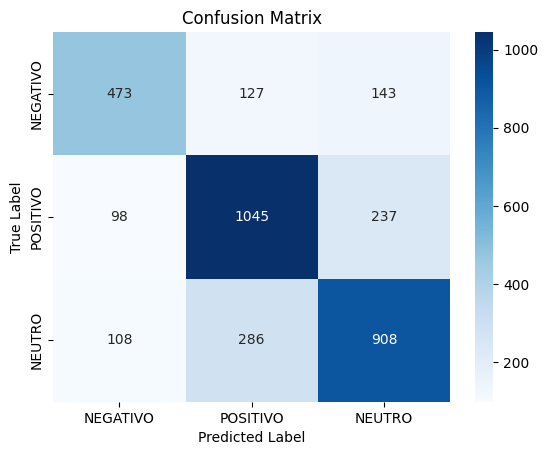

In [ ]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Printar a matriz de confusão
labels = ['NEGATIVO', 'POSITIVO', 'NEUTRO']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 14.4 - Hiperparâmetros com Random Search do Embedding Layer

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import recall_score

def create_model(embedding_dim, vocab_size, max_length):
    # Criação do modelo
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Conv1D(32, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=128, activation='relu'),
        Dense(units=3, activation='softmax')  # Altere o número de unidades para o número de classes
    ])

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Dados de entrada
X = dfrnn_balanced['Frase'].values
Y = dfrnn_balanced['sentimento2'].values

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# Melhores hiperparâmetros encontrados
best_embedding_dim = 100
best_batch_size = 32

# Criação do modelo com os melhores hiperparâmetros
model = create_model(best_embedding_dim, vocab_size, max_length)

# Treinamento do modelo
model.fit(X_padded, Y, batch_size=best_batch_size, epochs=10, validation_split=0.2)

# Avaliação do modelo
y_pred = model.predict(X_padded)
y_pred = np.argmax(y_pred, axis=1)  # Converter as previsões para as classes numéricas
recall = recall_score(Y, y_pred, average='weighted')

print('Recall:', recall)


Epoch 1/10
286/286 [==============================] - 23s 78ms/step - loss: 0.8187 - accuracy: 0.6284 - val_loss: 1.3053 - val_accuracy: 0.3885
Epoch 2/10
286/286 [==============================] - 20s 71ms/step - loss: 0.3737 - accuracy: 0.8614 - val_loss: 1.2577 - val_accuracy: 0.4906
Epoch 3/10
286/286 [==============================] - 22s 77ms/step - loss: 0.1187 - accuracy: 0.9641 - val_loss: 1.4258 - val_accuracy: 0.5239
Epoch 4/10
286/286 [==============================] - 21s 73ms/step - loss: 0.0647 - accuracy: 0.9822 - val_loss: 1.7894 - val_accuracy: 0.4700
Epoch 5/10
286/286 [==============================] - 28s 98ms/step - loss: 0.0495 - accuracy: 0.9874 - val_loss: 1.7427 - val_accuracy: 0.5015
Epoch 6/10
286/286 [==============================] - 23s 80ms/step - loss: 0.0418 - accuracy: 0.9893 - val_loss: 2.5531 - val_accuracy: 0.3986
Epoch 7/10
286/286 [==============================] - 23s 79ms/step - loss: 0.0350 - accuracy: 0.9908 - val_loss: 2.4118 - val_accuracy:

### 14.4.1 - Embedding Layer com os Melhores Hiperparâmetros

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import recall_score

def create_model(vocab_size, max_length):
    # Criação do modelo
    model = Sequential([
        Embedding(vocab_size, 100, input_length=max_length),  # Aplicação do melhor hiperparâmetro
        Conv1D(32, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=128, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])

    return model

# Dados de entrada
X = dfrnn_balanced['Frase'].values
Y = dfrnn_balanced['sentimento2'].values

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# Criação do modelo com o melhor hiperparâmetro
model = create_model(vocab_size, max_length)

# Treinamento do modelo
model.fit(X_padded, Y, batch_size=32, epochs=10, validation_split=0.2)

# Avaliação do modelo
loss, accuracy, recall = model.evaluate(X_padded, Y)

ELRecall = recall;

print('Recall:', ELRecall)


### 14.5 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [ ]:
"""
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsEmbeddingLayer.csv', index=False)
print("Salvo com sucesso")
"""

### 14.6 - Exportar o Modelo Embedding Layer com pickle


In [ ]:
# Salvar o modelo RNN em um arquivo PKL
with open('/content/drive/MyDrive/PROJETO BTG/modelo_embedding_layer.pkl', 'wb') as arquivo:
    pickle.dump(model, arquivo)

## Embedding Layer - Três categorias e com balanceamento

### 14.2 - Teste de Função

In [ ]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative, df_neutral_resampled])

# Separar os dados em X e y (balanceados)
X = dfrnn_balanced['Frase'].values
y = dfrnn_balanced['sentimento2'].values

model, y_test, y_pred = classification_embedding_layer(X, y)

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

In [ ]:
import seaborn as sns

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### 14.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [ ]:
# df_resultEL